In [1]:
import socnavgym
import gymnasium as gym
from socnavgym.wrappers import DiscreteActions
from socnavgym.wrappers import CardinalActions
from rl.QLearning import *
from rl.MSR import *
from rl.SR import *
from rl.SF import *
from rl.DQN import *
from rl.DSR import *
from rl.SRQ import *
from rl.SRDec import *

from tqdm.auto import trange
import imageio
from utils.StateDiscretizer import *
from utils.TileCoder import *

In [2]:
env = gym.make("SocNavGym-v1", config="./configs/2_humans.yaml") 
env = DiscreteActions(env)

SEED = 5
EPISODES = 500

/home/adonis/Documents/Thesis/socnavgym/SocNavGym/socnavgym/envs/utils/sngnnv2/socnav_V2_API.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.GNNmodel.load_state_di

In [3]:
discretizer = StateDiscretizer(xy_bins=30, env=env)

#agent = QL(
#        action_size=7,
#        learning_rate=0.3,
#        gamma=0.99, epsilon=0.05, discretizer=discretizer
#    )

#agent = MSR(
#        action_size=7,
#        learning_rate_topo=0.1,
#        learning_rate_social=0.1,
#        r_learning_rate_topo=0.1,
#        r_learning_rate_social=0.1,
#        gamma=0.99, epsilon=0.05
#    )

#agent = SR(
#        action_size=7,
#        learning_rate=0.00001,
#        r_learning_rate=0.1,
#        gamma=0.1, epsilon=0.05, discretizer=discretizer
#    )

#agent = DQN(
#        action_size=7,
#        learning_rate=0.01,
#        epsilon=0.05, env=env
#    )
#agent = DSRAgent(
#        action_size=7,
#        learning_rate=0.001,
#        epsilon=0.05
#    )
#agent = SF(
#        action_size=7,
#        sf_lr=0.1,
#        w_lr=0.5,
#        gamma=0.99, epsilon=0.05
#    )

In [4]:
#rewards_dqn = []
#length_dqn = []
#
#for episode in trange(EPISODES):
#    obs = env.reset(seed=SEED)
#    episodes_length, episodes_rewards = agent.act(env, obs)
#    length_dqn.append(episodes_length)
#    rewards_dqn.append(episodes_rewards)

In [5]:
#import numpy as np
#import matplotlib.pyplot as plt
#from matplotlib import cm
#from matplotlib.colors import Normalize
#from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
#
#
#def build_dense_sr(agent):
#    """
#    Convert sparse dict-based SR:
#        agent.SR[state][action][next_state] -> float
#    into a dense tensor M[state_idx, action, next_state_idx].
#    Returns:
#        M            : np.ndarray of shape (num_states, num_actions, num_states)
#        state_list   : list of states (keys) ordered as indices 0..num_states-1
#        state_index  : dict mapping state -> index
#    """
#    sr = agent.SR           # defaultdict(lambda: defaultdict(lambda: defaultdict(float)))
#    n_actions = agent.action_size
#
#    # Collect all states that appear either as s or s'
#    states = set(sr.keys())
#    for s, a_dict in sr.items():
#        for a, sp_dict in a_dict.items():
#            states.update(sp_dict.keys())
#
#    state_list = sorted(states, key=lambda x: x)  # or list(states) if you prefer raw order
#    num_states = len(state_list)
#
#    state_index = {s: i for i, s in enumerate(state_list)}
#
#    # Dense SR tensor
#    M = np.zeros((num_states, n_actions, num_states), dtype=np.float32)
#
#    for s, a_dict in sr.items():
#        i = state_index[s]
#        for a, sp_dict in a_dict.items():
#            for s_prime, val in sp_dict.items():
#                j = state_index[s_prime]
#                M[i, a, j] = float(val)
#
#    return M, state_list, state_index
#
#
#def plot_sr_3d(agent, action_labels=None, step=6):
#    """
#    Plot 3D bars of SR tensor M[state, action, next_state].
#
#    Parameters
#    ----------
#    agent : object with
#        - agent.SR         : dict-based SR
#        - agent.action_size
#    action_labels : list of str or None
#        Labels for actions on Y axis. If None, uses "a0", "a1", ...
#    step : int
#        Tick step for x (state) and z (next_state) axes.
#    """
#    M, state_list, _ = build_dense_sr(agent)
#
#    num_states = M.shape[0]
#    num_actions = M.shape[1]
#    num_next = M.shape[2]
#
#    if action_labels is None:
#        action_labels = [f"a{i}" for i in range(num_actions)]
#    else:
#        # truncate or pad to match num_actions
#        if len(action_labels) < num_actions:
#            action_labels = list(action_labels) + [
#                f"a{i}" for i in range(len(action_labels), num_actions)
#            ]
#        action_labels = action_labels[:num_actions]
#
#    # Prepare grid of bars
#    xs, ys, zs = np.indices((num_states, num_actions, num_next))
#    xs = xs.ravel()
#    ys = ys.ravel()
#    zs = zs.ravel()
#
#    vals = M.ravel()
#    dx = dy = dz = 0.8
#
#    norm = Normalize(vmin=vals.min(), vmax=vals.max())
#    colors = cm.viridis(norm(vals))
#
#    fig = plt.figure(figsize=(6, 6))
#    ax = fig.add_subplot(111, projection="3d")
#
#    # 3D bars
#    ax.bar3d(xs, ys, zs, dx, dy, dz, color=colors, shade=True)
#
#    # axis labels (x and y only)
#    ax.set_xlabel("State (s)", fontsize=11, labelpad=10)
#    ax.set_ylabel("Action (a)", fontsize=11, labelpad=10)
#
#    # center y ticks for actions
#    y_centers = np.arange(num_actions) + dy / 2.0
#    ax.set_yticks(y_centers)
#    ax.set_yticklabels(action_labels, fontsize=10)
#
#    # fewer ticks on x and z so labels fit
#    if step <= 0:
#        step = 1
#    xticks = np.arange(0, num_states, step)
#    ax.set_xticks(xticks)
#    ax.set_xticklabels(xticks + 1, fontsize=8)
#
#    zticks = np.arange(0, num_states, step)
#    ax.set_zticks(zticks)
#    ax.set_zticklabels(zticks + 1, fontsize=8)
#
#    ax.set_xlim(0, num_states)
#    ax.set_ylim(-0.2, num_actions)
#    ax.set_zlim(0, num_states)
#
#    # adjust margins so cube is well inside the figure
#    plt.subplots_adjust(left=0.18, right=0.88, bottom=0.18, top=0.95)
#
#    # manual z label on the figure (always visible)
#    fig.text(
#        0.95, 0.5,
#        "Next State (s')",
#        rotation=90,
#        va="center",
#        ha="center",
#        fontsize=11,
#    )
#
#    plt.show()
#
#
## Example usage:
#action_labels = ["Up", "Down", "Left", "Right", "Stay", "CW", "CCW"]  # if 7 actions
#plot_sr_3d(agent, action_labels=action_labels, step=6)


In [6]:
#obs, _ = env.reset(seed=SEED)
#frames = []
#for i in range(600):
#    obs, reward, terminated, truncated, info = env.step(agent.sample_action(agent.get_features(obs)))
#    frame = env.render()
#    frames.append(frame)
#    if terminated or truncated:
#        break
#
#env.close()
#imageio.mimsave("videos/dqn.gif", frames, fps=20)

In [7]:
#agent = SR(
#        action_size=7,
#        learning_rate=0.4,
#        r_learning_rate=0.2,
#        gamma=0.5, epsilon=0.05, discretizer=discretizer
#    )
#
#rewards_sr = []
#length_sr = []
#
#for episode in trange(EPISODES):
#    obs = env.reset(seed=SEED)
#    episodes_length, episodes_rewards = agent.act(env, obs)
#    length_sr.append(episodes_length)
#    rewards_sr.append(episodes_rewards)

In [8]:
#obs, _ = env.reset(seed=SEED)
#frames = []
#for i in range(600):
#    obs, reward, terminated, truncated, info = env.step(agent.sample_action(agent.get_state_key(obs)))
#    frame = env.render()
#    frames.append(frame)
#    if terminated or truncated:
#        break
#
#env.close()
#imageio.mimsave("videos/sr.gif", frames, fps=20)

In [9]:
agent = SRDec(
        action_size=7,
        learning_rate=0.4,
        r_learning_rate=0.2,
        gamma=0.5, epsilon=0.05, discretizer=discretizer
    )

rewards_sr = []
length_sr = []

for episode in trange(EPISODES):
    obs = env.reset(seed=SEED)
    episodes_length, episodes_rewards = agent.act(env, obs)
    length_sr.append(episodes_length)
    rewards_sr.append(episodes_rewards)

  0%|          | 0/500 [00:00<?, ?it/s]

In [10]:
obs, _ = env.reset(seed=SEED)
frames = []
for i in range(600):
    obs, reward, terminated, truncated, info = env.step(agent.sample_action(agent.get_state(obs)))
    frame = env.render()
    frames.append(frame)
    if terminated or truncated:
        break

env.close()
imageio.mimsave("videos/sr_dec_2_humans.gif", frames, fps=20)

In [11]:
#agent = DSRAgent(
#        action_size=7,
#        learning_rate=0.0001,
#        gamma=0.99, epsilon=0.05
#    )
#
#rewards_dsr = []
#length_dsr = []
#
#for episode in trange(EPISODES):
#    obs = env.reset(seed=SEED)
#    episodes_length, episodes_rewards = agent.act(env, obs)
#    length_dsr.append(episodes_length)
#    rewards_dsr.append(episodes_rewards)

In [12]:
#obs, _ = env.reset(seed=SEED)
#frames = []
#for i in range(600):
#    obs, reward, terminated, truncated, info = env.step(agent.sample_action(agent.get_features(obs)))
#    frame = env.render()
#    frames.append(frame)
#    if terminated or truncated:
#        break
#
#env.close()
#imageio.mimsave("videos/dsr.gif", frames, fps=20)

In [13]:
def rolling_avg(x, w=1):
        return np.convolve(x, np.ones(w) / w, mode='valid')

In [14]:
#length_rolling_dqn = rolling_avg(length_dqn)
#rewards_rolling_dqn = rolling_avg(rewards_dqn)

#length_rolling_sr = rolling_avg(length_sr)
#rewards_rolling_sr = rolling_avg(rewards_sr)

length_rolling_sr = rolling_avg(length_sr)
rewards_rolling_sr = rolling_avg(rewards_sr)

#length_rolling_ql = rolling_avg(length_ql)
#rewards_rolling_ql = rolling_avg(rewards_ql)

#length_rolling_dsr = rolling_avg(length_dsr)
#rewards_rolling_dsr = rolling_avg(rewards_dsr)

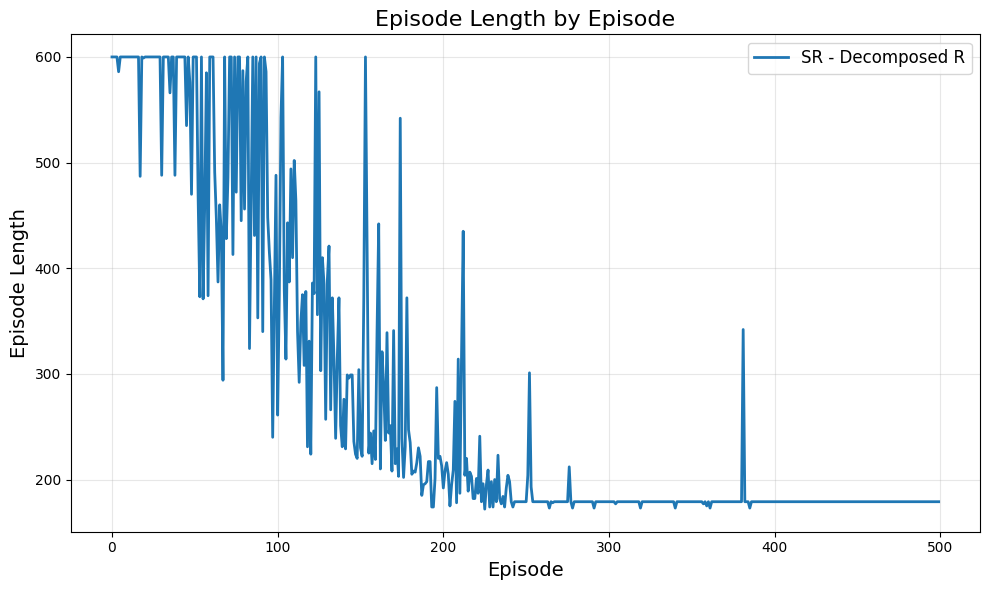

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

#ax.plot(length_dqn, linewidth=2, label="DQN")
#ax.plot(length_sr,  linewidth=2, label="SR")
ax.plot(length_rolling_sr,  linewidth=2, label="SR - Decomposed R")
#ax.plot(length_ql,  linewidth=2, label="QL")
#ax.plot(length_dsr,  linewidth=2, label="DSR")

ax.set_title("Episode Length by Episode", fontsize=16)
ax.set_xlabel("Episode", fontsize=14)
ax.set_ylabel("Episode Length", fontsize=14)

ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

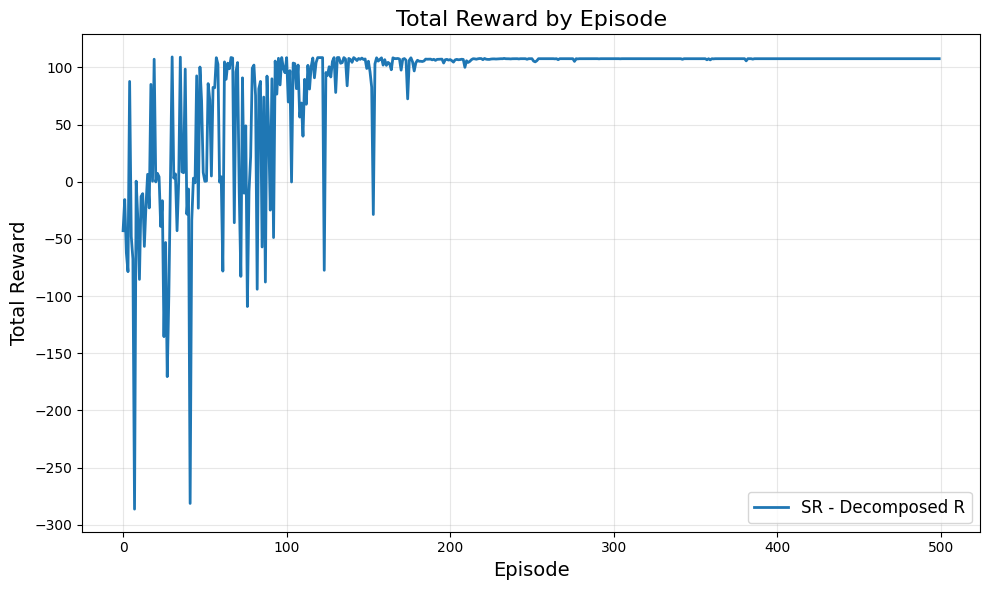

: 

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

#ax.plot(rewards_dqn, linewidth=2, label="DQN")
#ax.plot(rewards_sr,  linewidth=2, label="SR")
ax.plot(rewards_rolling_sr,  linewidth=2, label="SR - Decomposed R")
#ax.plot(rewards_ql,  linewidth=2, label="QL")
#ax.plot(rewards_dsr,  linewidth=2, label="DSR")

ax.set_title("Total Reward by Episode", fontsize=16)
ax.set_xlabel("Episode", fontsize=14)
ax.set_ylabel("Total Reward", fontsize=14)

ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()